In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [3]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0084,2018-05-01,False,"new params, longer params/hyperparms"


In [4]:
run_orig = RunManager('StatArbStrategy', 'run_0070', test_periods=0)
run_updated = RunManager('StatArbStrategy', 'run_0085', test_periods=0)

In [5]:
run_orig.import_return_frame()
run_updated.import_return_frame()

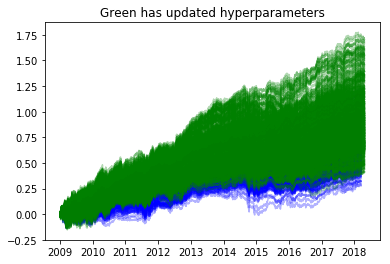

In [6]:
plt.figure()
plt.plot(run_orig.returns.cumsum(), 'b', alpha=0.3)
plt.plot(run_updated.returns.cumsum(), 'g', alpha=0.3)
plt.title('Green has updated hyperparameters')
plt.show()

In [7]:
run_updated.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,288,0.831815,0.059003,-999.0
1,holding_period,5,288,0.889279,0.066444,-999.0
2,holding_period,7,288,0.864266,0.067635,-999.0
3,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",432,0.930328,0.070619,-999.0
4,model,{u'type': u'reg'},432,0.793245,0.058102,-999.0
5,per_side_count,10,288,0.856078,0.065143,-999.0
6,per_side_count,20,288,0.695964,0.068388,-999.0
7,per_side_count,5,288,1.033318,0.059550,-999.0
8,response_days,10,432,0.891400,0.066222,-999.0
9,response_days,5,432,0.832173,0.062498,-999.0


# Combo Search for both

In [8]:
CombinationSearch().params

{'training_epochs': 1, 'training_freq': 'm', 'training_periods': 12}

In [9]:
comb1 = CombinationSearch()
comb1.add_run(run_orig)
comb1.params['training_epochs'] = 10
comb1.start()

Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [01:57<00:00, 11.74s/it]


In [10]:
comb2 = CombinationSearch()
comb2.add_run(run_updated)
comb2.params['training_epochs'] = 10
comb2.start()

Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [02:01<00:00, 12.06s/it]


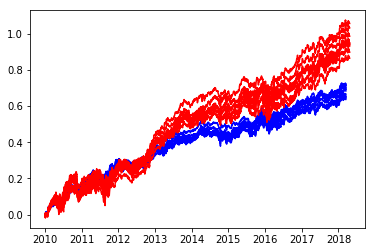

In [19]:
plt.figure()
plt.plot(comb1.best_results_returns.cumsum(), 'b')
plt.plot(comb2.best_results_returns.cumsum(), 'r')
plt.show()

In [20]:
# ORIGINAL - Average across all models
df = rollup_returns(comb1.best_results_returns.mean(axis=1).to_frame())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.065159,0.007762,0.072423,0.011692,0.157037
2011,0.048559,0.011105,-0.006917,0.073461,0.126208
2012,-0.014271,0.001713,0.016120,0.058796,0.062358
2013,0.004155,0.039909,0.025107,0.005271,0.074442
2014,0.050084,-0.015116,-0.019675,0.003840,0.019133
2015,0.020977,0.029616,-0.017638,0.070065,0.103019
2016,-0.011501,0.018882,0.012285,0.035560,0.055226
2017,0.018391,0.021375,-0.006306,0.021900,0.055360


In [21]:
df.iloc[:-1].mean()

Qtr
1     0.022694
2     0.014406
3     0.009425
4     0.035073
yr    0.081598
dtype: float64

In [22]:
# UPDATED - Average across all models
df = rollup_returns(comb2.best_results_returns.mean(axis=1).to_frame())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.082466,-0.007702,0.102360,-0.040309,0.136815
2011,0.031535,0.032119,-0.048695,0.100060,0.115019
2012,0.010210,-0.000605,0.024691,0.106798,0.141094
2013,0.021621,0.049538,0.075935,-0.015605,0.131489
2014,0.044333,0.018448,-0.009116,0.023782,0.077447
2015,-0.011183,0.070897,-0.035349,0.037194,0.061560
2016,0.018520,0.005250,0.009852,0.075860,0.109482
2017,0.035411,0.053085,0.020440,0.019858,0.128794


In [23]:
df.iloc[:-1].mean()

Qtr
1     0.029114
2     0.027629
3     0.017515
4     0.038455
yr    0.112712
dtype: float64